## 예제 1. 3차 다항식(third order polynomial)을 사용하여 y=sin(x) 에 근사(fit)

sin(x) => $ a+bx+cx^2+dx^3$ 으로 근사 

* a,b,c,d에 random한 값을 부여하여 계산된 예측값 y와의 Loss를 줄이는 방법으로 반복
* 이로부터 계산된 a,b,c,d의 gradient를 계산하여 역전파 이용
* 가중치를 갱신하여 학습시켜 a,b,c,d의 값을 계산

In [3]:
# -*- coding: utf-8 -*-
import numpy as np
import math

# 무작위로 입력과 출력 데이터를 생성합니다
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# 무작위로 가중치를 초기화합니다
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(2000):
    # 순전파 단계: 예측값 y를 계산합니다
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # 손실(loss)을 계산하고 출력합니다
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # 손실에 따른 a, b, c, d의 변화도(gradient)를 계산하고 역전파합니다.
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # 가중치를 갱신합니다.
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 1805.3314420575987
199 1241.211108723504
299 855.1928424794999
399 590.7424775297212
499 409.36723634780066
599 284.82784216324876
699 199.21740832261898
799 140.30143365176005
899 99.71134112013793
999 71.7163181798395
1099 52.3873927610835
1199 39.027833932636966
1299 29.784584194940734
1399 23.382883745425627
1499 18.944821471664174
1599 15.8651275938197
1699 13.726052275219441
1799 12.238963730927804
1899 11.204233024477809
1999 10.483648564747424
Result: y = 0.03878306937643203 + 0.8392434936920192 x + -0.006690724820494566 x^2 + -0.0908415434593017 x^3


In [2]:
# -*- coding: utf-8 -*-

import torch
import math


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # GPU에서 실행하려면 이 주석을 제거하세요

# 무작위로 입력과 출력 데이터를 생성합니다
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# 무작위로 가중치를 초기화합니다
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # 순전파 단계: 예측값 y를 계산합니다
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # 손실(loss)을 계산하고 출력합니다
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # 손실에 따른 a, b, c, d의 변화도(gradient)를 계산하고 역전파합니다.
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # 가중치를 갱신합니다.
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 1249.013916015625
199 829.255615234375
299 551.586669921875
399 367.90374755859375
499 246.39044189453125
599 166.00257873535156
699 112.81993103027344
799 77.63412475585938
899 54.3543701171875
999 38.95124435424805
1099 28.759315490722656
1199 22.015178680419922
1299 17.55231475830078
1399 14.598919868469238
1499 12.644339561462402
1599 11.350750923156738
1699 10.494498252868652
1799 9.927730560302734
1899 9.552541732788086
1999 9.304144859313965
Result: y = 0.0034856456331908703 + 0.8355294466018677 x + -0.00060133176157251 x^2 + -0.09031324833631516 x^3


## 예제2. Autograd

* 위의 예제 1은 신경망의 순전파 단계와 역전파 단계를 직접 구현 => 작은 계층에서는 큰 문제가 발생하지 않지만, 복잡한 대규모 신경망에서는 불안한 과정
* 자동미분을 이용하여 신경망의 역전파 단계 연산을 자동화할 수 있음 (Autograd)

In [4]:
# -*- coding: utf-8 -*-
import torch
import math

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # GPU에서 실행하려면 이 주석을 제거하세요

# 입력값과 출력값을 갖는 텐서들을 생성합니다.
# requires_grad=False가 기본값으로 설정되어 역전파 단계 중에 이 텐서들에 대한 변화도를
# 계산할 필요가 없음을 나타냅니다.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# 가중치를 갖는 임의의 텐서를 생성합니다. 3차 다항식이므로 4개의 가중치가 필요합니다:
# y = a + b x + c x^2 + d x^3
# requires_grad=True로 설정하여 역전파 단계 중에 이 텐서들에 대한 변화도를 계산할 필요가 
# 있음을 나타냅니다.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # 순전파 단계: 텐서들 간의 연산을 사용하여 예측값 y를 계산합니다.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # 텐서들간의 연산을 사용하여 손실(loss)을 계산하고 출력합니다.
    # 이 때 손실은 (1,) shape을 갖는 텐서입니다.
    # loss.item() 으로 손실이 갖고 있는 스칼라 값을 가져올 수 있습니다.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # autograd 를 사용하여 역전파 단계를 계산합니다. 이는 requires_grad=True를 갖는
    # 모든 텐서들에 대한 손실의 변화도를 계산합니다. 
    # 이후 a.grad와 b.grad, c.grad, d.grad는 각각 a, b, c, d에 대한 손실의 변화도를
    # 갖는 텐서가 됩니다.
    loss.backward()

    # 경사하강법(gradient descent)를 사용하여 가중치를 직접 갱신합니다.
    # torch.no_grad()로 감싸는 이유는, 가중치들이 requires_grad=True 지만
    # autograd에서는 이를 추적하지 않을 것이기 때문입니다.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # 가중치 갱신 후에는 변화도를 직접 0으로 만듭니다.
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 760.0572509765625
199 540.1861572265625
299 384.6791687011719
399 274.68914794921875
499 196.8909912109375
599 141.86106872558594
699 102.93489074707031
799 75.3992691040039
899 55.920597076416016
999 42.141075134277344
1099 32.39299774169922
1199 25.496732711791992
1299 20.61791229248047
1399 17.166284561157227
1499 14.72430419921875
1599 12.996622085571289
1699 11.774275779724121
1799 10.909449577331543
1899 10.297560691833496
1999 9.864630699157715
Result: y = -0.034223686903715134 + 0.8553429841995239 x + 0.005904155317693949 x^2 + -0.09313154965639114 x^3


## 예제3. 새 autograd function 정의하기

* autograd의 기본(primitive) 연산자는 실제로 텐서를 조작하는 2개의 함수
* forward 함수는 입력 텐서로부터 출력 텐서를 계산 (순전파 계산)
* backward 함수는 어떤 스칼라 값에 대한 출력 텐서의 변화도(gradient)를 전달받고, 동일한 스칼라 값에 대한 입력 텐서의 변화도를 계산 (역전파 계산)


=> 사용자 정의 autograd 연산자를 쉽게 정의할 수 있음


=> 그 후, 인스턴스(instance)를 생성하고 이를 함수처럼 호출하고, 입력 데이터를 갖는 텐서를 전달하는 식으로 새로운 autograd 연산자를 사용할 수 있음

여기에서는 $a+bx+cx^2+dx^3$ 대신 $y=a+bP_3(c+dx)$ 로 정의 $P_3(x)=\frac{1}{2}(5x^3−3x)$인 3차 르장드르 다항식(Legendre polynomial)

In [5]:
# -*- coding: utf-8 -*-
import torch
import math


class LegendrePolynomial3(torch.autograd.Function):
    """
    torch.autograd.Function을 상속받아 사용자 정의 autograd Function을 구현하고,
    텐서 연산을 하는 순전파 단계와 역전파 단계를 구현해보겠습니다.
    """

    @staticmethod
    def forward(ctx, input):
        """
        순전파 단계에서는 입력을 갖는 텐서를 받아 출력을 갖는 텐서를 반환합니다.
        ctx는 컨텍스트 객체(context object)로 역전파 연산을 위한 정보 저장에 사용합니다.
        ctx.save_for_backward 메소드를 사용하여 역전파 단계에서 사용할 어떤 객체도
        저장(cache)해 둘 수 있습니다.
        """
        ctx.save_for_backward(input)
        return 0.5 * (5 * input ** 3 - 3 * input)

    @staticmethod
    def backward(ctx, grad_output):
        """
        역전파 단계에서는 출력에 대한 손실(loss)의 변화도(gradient)를 갖는 텐서를 받고,
        입력에 대한 손실의 변화도를 계산해야 합니다.
        """
        input, = ctx.saved_tensors
        return grad_output * 1.5 * (5 * input ** 2 - 1)  #르장르드 다항식의 미분


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # GPU에서 실행하려면 이 주석을 제거하세요

# 입력값과 출력값을 갖는 텐서들을 생성합니다.
# requires_grad=False가 기본값으로 설정되어 역전파 단계 중에 이 텐서들에 대한 변화도를 계산할
# 필요가 없음을 나타냅니다.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# 가중치를 갖는 임의의 텐서를 생성합니다. 3차 다항식이므로 4개의 가중치가 필요합니다:
# y = a + b * P3(c + d * x) 
# 이 가중치들이 수렴(convergence)하기 위해서는 정답으로부터 너무 멀리 떨어지지 않은 값으로
# 초기화가 되어야 합니다. 
# requires_grad=True로 설정하여 역전파 단계 중에 이 텐서들에 대한 변화도를 계산할 필요가
# 있음을 나타냅니다. 
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

learning_rate = 5e-6
for t in range(2000):
    # 사용자 정의 Function을 적용하기 위해 Function.apply 메소드를 사용합니다.
    # 여기에 'P3'라고 이름을 붙였습니다.
    P3 = LegendrePolynomial3.apply

    # 순전파 단계: 연산을 하여 예측값 y를 계산합니다; 
    # 사용자 정의 autograd 연산을 사용하여 P3를 계산합니다.
    y_pred = a + b * P3(c + d * x)

    # 손실을 계산하고 출력합니다.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # autograd를 사용하여 역전파 단계를 계산합니다.
    loss.backward()

    # 경사하강법(gradient descent)을 사용하여 가중치를 갱신합니다.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # 가중치 갱신 후에는 변화도를 직접 0으로 만듭니다.
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} * P3({c.item()} + {d.item()} x)')

99 209.95834350585938
199 144.66018676757812
299 100.70249938964844
399 71.03519439697266
499 50.97850799560547
599 37.403133392333984
699 28.206867218017578
799 21.973188400268555
899 17.7457275390625
999 14.877889633178711
1099 12.931766510009766
1199 11.610918045043945
1299 10.714258193969727
1399 10.10548210144043
1499 9.692106246948242
1599 9.411375999450684
1699 9.220745086669922
1799 9.091285705566406
1899 9.003361701965332
1999 8.943639755249023
Result: y = -6.8844756562214116e-09 + -2.208526849746704 * P3(1.5037101563919464e-09 + 0.2554861009120941 x)


## 예제4. nn 모듈

* nn 패키지는 신경망 계층(layer)과 거의 비슷한 Module 의 집합을 정의

$-$ Module은 입력 텐서를 받고 출력 텐서를 계산하는 한편, 학습 가능한 매개변수를 갖는 텐서들을 내부 상태(internal state)로 가짐

$-$ nn 패키지는 또한 신경망을 학습시킬 때 주로 사용하는 유용한 손실 함수(loss function)들도 정의

In [6]:
# -*- coding: utf-8 -*-
import torch
import math

# 입력값과 출력값을 갖는 텐서들을 생성합니다.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# 이 예제에서, 출력 y는 (x, x^2, x^3)의 선형 함수이므로, 선형 계층 신경망으로 간주할 수 있습니다.
# (x, x^2, x^3)를 위한 텐서를 준비합니다.
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# 언스퀴즈(Unsqueeze) : 특정 위치에 1인 차원을 추가한다.
# 위 코드에서, x.unsqueeze(-1)은 (2000, 1)의 shape을, p는 (3,)의 shape을 가지므로,
# 이 경우 브로드캐스트(broadcast)가 적용되어 (2000, 3)의 shape을 갖는 텐서를 얻습니다.  

# nn 패키지를 사용하여 모델을 순차적 계층(sequence of layers)으로 정의합니다.
# nn.Sequential은 다른 Module을 포함하는 Module로, 포함되는 Module들을 순차적으로 적용하여 
# 출력을 생성합니다. 각각의 Linear Module은 선형 함수(linear function)를 사용하여 입력으로부터
# 출력을 계산하고, 내부 Tensor에 가중치와 편향을 저장합니다.
# Flatten 계층은 선형 계층의 출력을 `y` 의 shape과 맞도록(match) 1D 텐서로 폅니다(flatten).
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# 또한 nn 패키지에는 주로 사용되는 손실 함수(loss function)들에 대한 정의도 포함되어 있습니다;
# 여기에서는 평균 제곱 오차(MSE; Mean Squared Error)를 손실 함수로 사용하겠습니다.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):

    # 순전파 단계: x를 모델에 전달하여 예측값 y를 계산합니다. Module 객체는 __call__ 연산자를 
    # 덮어써서(override) 함수처럼 호출할 수 있도록 합니다. 이렇게 함으로써 입력 데이터의 텐서를 Module에 전달하여
    # 출력 데이터의 텐서를 생성합니다.
    y_pred = model(xx)

    # 손실을 계산하고 출력합니다. 예측한 y와 정답인 y를 갖는 텐서들을 전달하고,
    # 손실 함수는 손실(loss)을 갖는 텐서를 반환합니다.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # 역전파 단계를 실행하기 전에 변화도(gradient)를 0으로 만듭니다.
    model.zero_grad()

    # 역전파 단계: 모델의 학습 가능한 모든 매개변수에 대해 손실의 변화도를 계산합니다.
    # 내부적으로 각 Module의 매개변수는 requires_grad=True일 때 텐서에 저장되므로,
    # 아래 호출은 모델의 모든 학습 가능한 매개변수의 변화도를 계산하게 됩니다.
    loss.backward()

    # 경사하강법을 사용하여 가중치를 갱신합니다.
    # 각 매개변수는 텐서이므로, 이전에 했던 것처럼 변화도에 접근할 수 있습니다.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# list의 첫번째 항목에 접근하는 것처럼 `model` 의 첫번째 계층(layer)에 접근할 수 있습니다.
linear_layer = model[0]

# 선형 계층에서, 매개변수는 `weights` 와 `bias` 로 저장됩니다.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 1425.711181640625
199 946.0405883789062
299 628.77001953125
399 418.91241455078125
499 280.0997009277344
599 188.2784423828125
699 127.53953552246094
799 87.3603286743164
899 60.78062057495117
999 43.19698715209961
1099 31.56426429748535
1199 23.86821174621582
1299 18.776424407958984
1399 15.407512664794922
1499 13.178378105163574
1599 11.70338249206543
1699 10.7273530960083
1799 10.081448554992676
1899 9.654035568237305
1999 9.371145248413086
Result: y = 0.003194281132891774 + 0.8340499401092529 x + -0.000551067350897938 x^2 + -0.09010280668735504 x^3


## 예제5. optim

* optim 패키지는 최적화 알고리즘에 대한 아이디어를 추상화하고 일반적으로 사용하는 최적화 알고리즘의 구현체(implementation)를 제공
* 예제 5에서는 nn 패키지를 사용하여 모델을 정의, 모델을 최적화할 때는 optim 패키지가 제공하는 RMSProp 알고리즘을 사용

In [7]:
# -*- coding: utf-8 -*-
import torch
import math

# 입력값과 출력값을 갖는 텐서들을 생성합니다.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# 입력 텐서 (x, x^2, x^3)를 준비합니다.
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# nn 패키지를 사용하여 모델과 손실 함수를 정의합니다.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# optim 패키지를 사용하여 모델의 가중치를 갱신할 optimizer를 정의합니다.
# 여기서는 RMSprop을 사용하겠습니다; optim 패키지는 다른 다양한 최적화 알고리즘을 포함하고 있습니다.
# RMSprop 생성자의 첫번째 인자는 어떤 텐서가 갱신되어야 하는지를 알려줍니다.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(2000):
    # 순전파 단계: 모델에 x를 전달하여 예측값 y를 계산합니다.
    y_pred = model(xx)

    # 손실을 계산하고 출력합니다.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # 역전파 단계 전에, optimizer 객체를 사용하여 (모델의 학습 가능한 가중치인) 갱신할
    # 변수들에 대한 모든 변화도(gradient)를 0으로 만듭니다. 이렇게 하는 이유는 기본적으로 
    # .backward()를 호출할 때마다 변화도가 버퍼(buffer)에 (덮어쓰지 않고) 누적되기
    # 때문입니다. 더 자세한 내용은 torch.autograd.backward에 대한 문서를 참조하세요.
    optimizer.zero_grad()

    # 역전파 단계: 모델의 매개변수들에 대한 손실의 변화도를 계산합니다.
    loss.backward()

    # optimizer의 step 함수를 호출하면 매개변수가 갱신됩니다.
    optimizer.step()


linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 13079.2509765625
199 4930.685546875
299 1941.34814453125
399 1147.7689208984375
499 979.0870361328125
599 857.04443359375
699 718.9473266601562
799 579.6416625976562
899 451.16082763671875
999 339.36444091796875
1099 245.5313262939453
1199 169.40846252441406
1299 110.12274169921875
1399 66.52693939208984
1499 37.12445068359375
1599 19.86642074584961
1699 12.180161476135254
1799 9.472967147827148
1899 8.990206718444824
1999 8.895828247070312
Result: y = 0.0005024721613153815 + 0.8565290570259094 x + 0.0005024627316743135 x^2 + -0.09282875806093216 x^3


## 예제6. nn.Module

* 때대로 기존 Module의 구성(sequence)보다 더 복잡한 모델을 구성해야 할 때 존재

-> 이러한 경우에는 nn.Module 의 하위 클래스(subclass)로 새로운 Module을 정의하고, 입력 텐서를 받아 다른 모듈 및 autograd 연산을 사용하여 출력 텐서를 만드는 forward 를 정의

=> 이 예제에서는 3차 다항식을 사용자 정의 Module 하위클래스(subclass)로 구현

In [8]:
# -*- coding: utf-8 -*-
import torch
import math


class Polynomial3(torch.nn.Module):
    def __init__(self):
        """
        생성자에서 4개의 매개변수를 생성(instantiate)하고, 멤버 변수로 지정합니다.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        순전파 함수에서는 입력 데이터의 텐서를 받고 출력 데이터의 텐서를 반환해야 합니다.
        텐서들 간의 임의의 연산뿐만 아니라, 생성자에서 정의한 Module을 사용할 수 있습니다.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

    def string(self):
        """
        Python의 다른 클래스(class)처럼, PyTorch 모듈을 사용해서 사용자 정의 메소드를 정의할 수 있습니다.
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'


# 입력값과 출력값을 갖는 텐서들을 생성합니다.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# 위에서 정의한 클래스로 모델을 생성합니다.
model = Polynomial3()

# 손실 함수와 optimizer를 생성합니다. SGD 생성자에 model.paramaters()를 호출해주면
# 모델의 멤버 학습 가능한 (torch.nn.Parameter로 정의된) 매개변수들이 포함됩니다.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
for t in range(2000):
    # 순전파 단계: 모델에 x를 전달하여 예측값 y를 계산합니다.
    y_pred = model(x)

    # 손실을 계산하고 출력합니다.
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # 변화도를 0으로 만들고, 역전파 단계를 수행하고, 가중치를 갱신합니다.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

99 208.79962158203125
199 142.02362060546875
299 97.58750915527344
399 68.0030746459961
499 48.29802703857422
599 35.167510986328125
699 26.413745880126953
799 20.574892044067383
899 16.678316116333008
999 14.076416969299316
1099 12.33806037902832
1199 11.175952911376953
1299 10.398547172546387
1399 9.878191947937012
1499 9.529611587524414
1599 9.295936584472656
1699 9.139182090759277
1799 9.033937454223633
1899 8.96322250366211
1999 8.915670394897461
Result: y = -0.00573355657979846 + 0.8486566543579102 x + 0.000989131978712976 x^2 + -0.09218048304319382 x^3


## 예제7. 제어 흐름(Control Flow) + 가중치 공유(Weight Sharing)

* 각 순전파 단계에서 3 ~ 5 사이의 임의의 숫자(random number)를 선택하여 다차항들에서 사용하고, 동일한 가중치를 여러번 재사용하여 4차항과 5차항을 계산

In [30]:
# -*- coding: utf-8 -*-
import random
import torch
import math


class DynamicNet(torch.nn.Module):
    def __init__(self):
        """
        생성자에서 5개의 매개변수를 생성(instantiate)하고 멤버 변수로 지정합니다.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
        self.e = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        모델의 순전파 단계에서는 무작위로 4, 5 중 하나를 선택한 뒤 매개변수 e를 재사용하여
        이 차수들의 기여도(contribution)를 계산합니다.

        각 순전파 단계는 동적 연산 그래프를 구성하기 떄문에, 모델의 순전파 단계를 정의할 때
        반복문이나 조건문과 같은 일반적인 Python 제어-흐름 연산자를 사용할 수 있습니다.

        여기에서 연산 그래프를 정의할 때 동일한 매개변수를 여러번 사용하는 것이 완벽히 안전하다는
        것을 알 수 있습니다.
        """
        y = self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3
        for exp in range(4, random.randint(4, 6)):
            y = y + self.e * x ** exp
        return y

    def string(self):
        """
        Python의 다른 클래스(class)처럼, PyTorch 모듈을 사용해서 사용자 정의 메소드를 정의할 수 있습니다.
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3 + {self.e.item()} x^4 ? + {self.e.item()} x^5 ?'


# 입력값과 출력값을 갖는 텐서들을 생성합니다.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# 위에서 정의한 클래스로 모델을 생성합니다.
model = DynamicNet()

# 손실 함수와 optimizer를 생성합니다. 이 이상한 모델을 순수한 확률적 경사하강법(SGD; Stochastic Gradient Descent)으로
# 학습하는 것은 어려우므로, 모멘텀(momentum)을 사용합니다.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-8, momentum=0.9)
for t in range(30000):
    # 순전파 단계: 모델에 x를 전달하여 예측값 y를 계산합니다.
    y_pred = model(x)

    # 손실을 계산하고 출력합니다.
    loss = criterion(y_pred, y)
    if t % 2000 == 1999:
        print(t, loss.item())

    # 변화도를 0으로 만들고, 역전파 단계를 수행하고, 가중치를 갱신합니다.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

1999 986.9899291992188
3999 395.8124084472656
5999 200.4368896484375
7999 102.88908386230469
9999 81.92501831054688
11999 33.86530303955078
13999 48.31570816040039
15999 14.81592082977295
17999 11.866168975830078
19999 9.961334228515625
21999 14.357606887817383
23999 9.173203468322754
25999 8.693696975708008
27999 8.954849243164062
29999 8.892570495605469
Result: y = 0.0077731432393193245 + 0.8569595813751221 x + -0.001951104961335659 x^2 + -0.09369280934333801 x^3 + 0.00013188777666073292 x^4 ? + 0.00013188777666073292 x^5 ?


In [28]:
!pip install IPython 
from IPython.display import Image

You should consider upgrading via the '/Users/mac/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


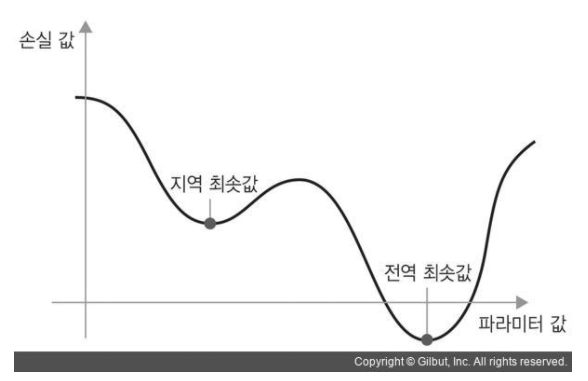

In [29]:
Image("/Users/mac/Dropbox/Y_AI_LAB/파이토치스터디/SDG+momentum.png")

* 구하려는 함수의 미분 그래프가 2차함수가 아닌 3차 이상의 그래프일 경우 최소점이 2개 이상 생기는 경우가 발생 -> 지역 최솟값에서 멈춤
* sgd에다가 이전의 이동값을 고려하도록 설계하여 momentum. 즉, 관성을 줌
* 혹여 지역 최소값에 도달하더라도 앞으로 나아가서 지역 최소값을 탈출할 수 있도록 설정